In [12]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [13]:
train=pd.read_csv(r"/content/drive/My Drive/Project/train_E6oV3lV.csv")
test=pd.read_csv(r"/content/drive/My Drive/Project/test_tweets_anuFYb8.csv")

In [14]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [15]:
combi=train.append(test,ignore_index=True)

In [16]:
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern, input_txt)
  for i in r:
    input_txt= re.sub(i, "", input_txt)

    return input_txt

In [17]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [18]:
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in ...,None
4,5,0.0,factsguide: society now #motivation,None
5,6,0.0,[2/2] huge fan fare and big talking before the...,None
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,None
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,None
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [19]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [20]:
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in ...,None
4,5,0.0,factsguide: society now #motivation,None
5,6,0.0,[2/2] huge fan fare and big talking before the...,None
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,None
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,None
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [21]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [22]:
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in ...,None
4,5,0.0,factsguide: society now #motivation,None
5,6,0.0,[2/2] huge fan fare and big talking before the...,None
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,None
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,None
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [24]:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(20)

0     [when, father, dysfunctional, selfish, drags, ...
1     [thanks, #lyft, credit, cause, they, offer, wh...
2                                                [None]
3                                                [None]
4                                                [None]
5                                                [None]
6                            [camping, tomorrow, danny]
7                                                [None]
8                                                [None]
9                                       [welcome, here]
10                                               [None]
11                                               [None]
12                                               [None]
13    [#cnn, calls, #michigan, middle, school, build...
14                                               [None]
15                                               [None]
16                                               [None]
17                                              

In [25]:
from nltk.stem.porter import *
stemmer= PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                                               [none]
3                                               [none]
4                                               [none]
5                                               [none]
6                              [camp, tomorrow, danni]
7                                               [none]
8                                               [none]
9                                       [welcom, here]
Name: tidy_tweet, dtype: object

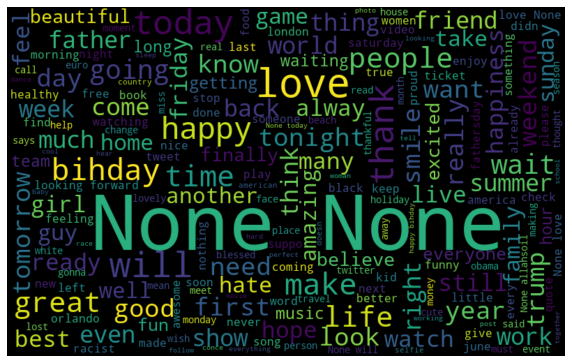

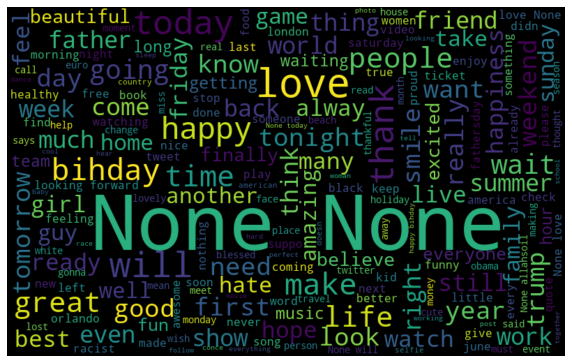

In [27]:
all_words= " ".join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud =WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

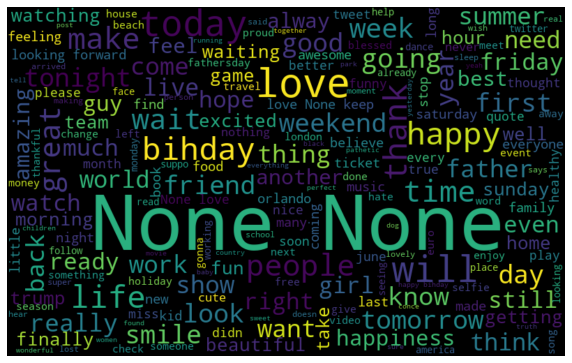

In [30]:
normal_words=" ".join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud =WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


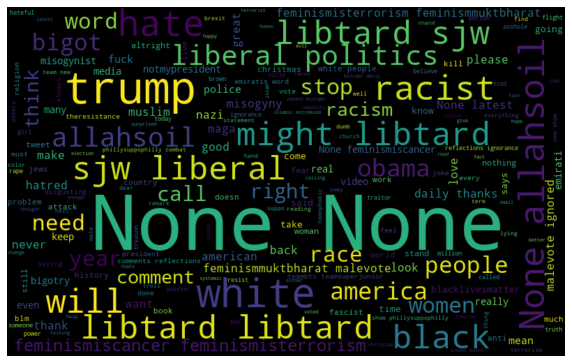

In [31]:
negative_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud =WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
def hashtag_extract(x):
  hashtags =[]
  for i in x:
    ht= re.findall(r"#(\w+)", i)
    hashtags.append(ht)

  return hashtags

In [33]:
HT_regular =hashtag_extract(combi['tidy_tweet'][combi['label']==0])

HT_negative =hashtag_extract(combi['tidy_tweet'][combi['label']==1])

HT_regular =sum(HT_regular,[])
HT_negative =sum(HT_negative,[])

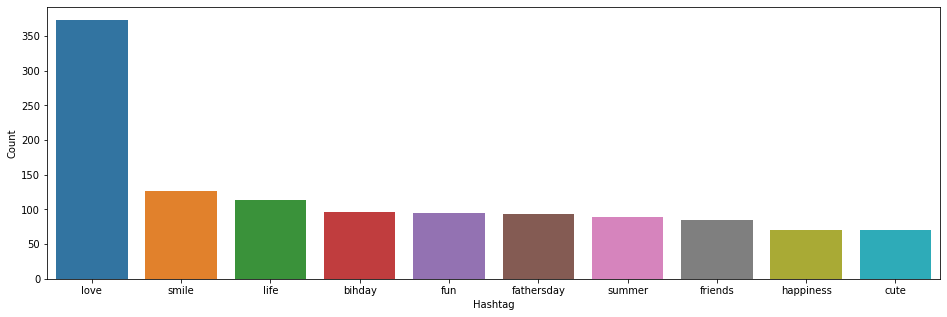

In [35]:
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d= d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

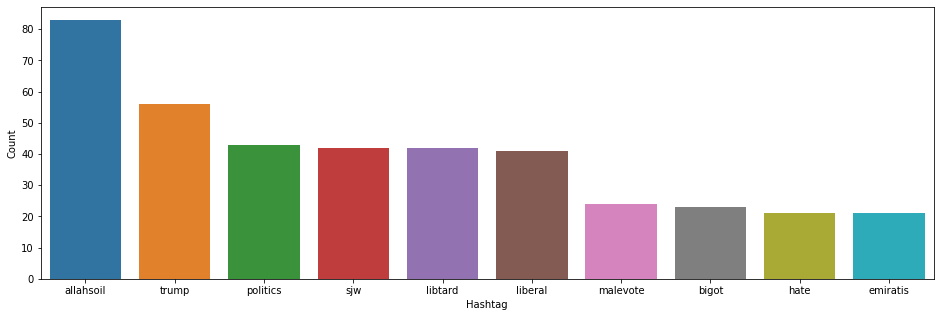

In [36]:
a=nltk.FreqDist(HT_negative)
d=pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d= d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer =CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)

prediction=lreg.predict_proba(xvalid_bow)

prediction_int=prediction[:,1]>=0.3

prediction_int=prediction_int.astype(np.int)

f1_score(yvalid,prediction_int)

0.32438238453276047

In [41]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3

test_pred_int=test_pred_int.astype(np.int)

test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)